In [1]:
from latools import *

import pandas as pd

%matplotlib inline

In [2]:
cd latools_demo/

/home/oscar/GitHub/latools/latools_demo


In [3]:
eg = analyse(data_folder='./data/', 
             internal_standard='Ca43', 
             config='DEFAULT', 
             srm_identifier='STD')

eg.despike(expdecay_despiker=True, noise_despiker=True)
eg.autorange(on_mult=[1.5, 0.8],
             off_mult=[0.8, 1.5])

# eg.trace_plots(ranges=True)

eg.bkg_calc_weightedmean(weight_fwhm=300, n_min=10)

eg.bkg_subtract()
eg.ratio()
eg.calibrate(drift_correct=False, 
             srms_used=['NIST610', 'NIST612', 'NIST614'])



Starting analysis using "UCD-AGILENT" configuration:
  5 Data Files Loaded: 2 standards, 3 samples
  Analytes: Mg24 Mg25 Al27 Ca43 Ca44 Mn55 Sr88 Ba137 Ba138
  Internal Standard: Ca43
Calculating exponential decay coefficient
from SRM Ca43 washouts...


AutoRange:   0%|          | 0/5 [00:00<?, ?it/s]

  -2.27
expdecay_spiker is broken... not run.


Applying Calibrations: 100%|██████████| 5/5 [00:00<00:00, 12.00it/s]


In [6]:
d = eg.data['STD-1']

In [12]:
d.data['rawdata']

{'Al27': array([2.20014000e+03, 2.80022000e+03, 2.00011000e+03, 1.60007000e+03,
        3.00025000e+03, 2.80022000e+03, 1.00003000e+03, 3.20029000e+03,
        2.20014000e+03, 1.90010000e+03, 2.20014000e+03, 2.50018000e+03,
        2.00011000e+03, 3.00025000e+03, 3.70039000e+03, 1.50006000e+03,
        3.30031000e+03, 2.50018000e+03, 7.00010000e+02, 2.60019000e+03,
        2.90024000e+03, 2.50018000e+03, 3.10027000e+03, 2.10012000e+03,
        2.00011000e+03, 2.40016000e+03, 1.80009000e+03, 1.30005000e+03,
        3.10027000e+03, 2.10012000e+03, 3.10027000e+03, 1.70008000e+03,
        2.60019000e+03, 1.10003000e+03, 1.80009000e+03, 2.20014000e+03,
        1.30005000e+03, 3.30031000e+03, 2.20014000e+03, 2.10012000e+03,
        2.10012000e+03, 3.00025000e+03, 2.10012000e+03, 2.50018000e+03,
        2.10012000e+03, 2.80022000e+03, 2.70021000e+03, 1.40006000e+03,
        1.90010000e+03, 2.00011000e+03, 2.40016000e+03, 2.60019000e+03,
        1.90010000e+03, 2.20014000e+03, 2.20014000e+03, 

In [5]:
d = eg.data['Sample-1']

In [14]:
d.setfocus('despiked')

In [ ]:
eg.fil

In [4]:
# fig, ax = eg.calibration_plot()

In [5]:
d = eg.data['Sample-3']

In [6]:
# fig, ax = d.tplot(scale='log')
# fig.savefig('../docs/source/users/beginners/figs/calibrated_Sample-3.png')

In [7]:
# fig, axs = eg.crossplot(subset='All_Samples')
# fig.savefig('../docs/source/users/beginners/figs/crossplot.png', dpi=300)

In [8]:
eg.filter_clear()

In [9]:
# eg.filter_threshold('Al27', 200e-6)
eg.filter_threshold('Al27', 100e-6)

Threshold Filter: 100%|██████████| 3/3 [00:00<00:00, 1744.24it/s]


In [10]:
eg.make_subset(samples='Sample-1', name='set1')
eg.make_subset(samples=['Sample-2', 'Sample-3'], name='set2')

eg.filter_on(filt=0, subset='set1')
eg.filter_off(filt=0, subset='set2')

eg.filter_status()


Subset: set1
Samples: Sample-1

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Al27_thresh_below    True   True   True   True   True   True   True   True   True   
1  Al27_thresh_above    False  False  False  False  False  False  False  False  False  

Subset: set2
Samples: Sample-2, Sample-3

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Al27_thresh_below    False  False  False  False  False  False  False  False  False  
1  Al27_thresh_above    False  False  False  False  False  False  False  False  False  

Subset: set1
Samples: Sample-1

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Al27_thresh_below    True   True   True   True   True   True   True   True   True   
1  Al27_thresh_above    False  False  False  False  False  False  False  False  False  
Subset: set2
Samples: Sample-2, Sample-3

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44  

In [11]:
eg.sample_stats(filt=True)

Calculating Stats: 100%|██████████| 5/5 [00:00<00:00, 91.59it/s]


In [12]:
eg.minimal_export(target_analytes=['Mg24', 'Ba138'])

In [13]:
test = reproduce('data_export/minimal_export/analysis.log')

latools analysis using "REPRODUCE" configuration:
  5 Data Files Loaded: 2 standards, 3 samples
  Analytes: Al27 Ba138 Ca43 Mg24
  Internal Standard: Ca43
SRM values loaded from: data_export/minimal_export/./srm.table
Calculating exponential decay coefficient
from SRM Ca43 washouts...
  -2.27


Despiking:   0%|          | 0/5 [00:00<?, ?it/s]/home/oscar/GitHub/latools/latools/D_obj.py:253: UserWarning: expdecay_spiker is broken... not run.
  warnings.warn('expdecay_spiker is broken... not run.')
Calculating Stats: 100%|██████████| 5/5 [00:00<00:00, 375.97it/s]

Subset: set1
Samples: Sample-1

n  Filter Name          Al27   Ba138  Ca43   Mg24   
0  Al27_thresh_below    True   True   True   True   
1  Al27_thresh_above    False  False  False  False  

Subset: set2
Samples: Sample-2, Sample-3

n  Filter Name          Al27   Ba138  Ca43   Mg24   
0  Al27_thresh_below    False  False  False  False  
1  Al27_thresh_above    False  False  False  False  



In [28]:
eg.getstats(save='latools_demo_export.csv')

Mg24      Mg25      Al27      Ca44      Mn55  \
statistic sample   rep                                                     
mean      Sample-1 0    0.012448  0.012295  0.000058  0.981950  0.000003   
                   1    0.011107  0.011450  0.000073  0.992095  0.000009   
                   2         NaN       NaN       NaN       NaN       NaN   
                   3    0.009666  0.009821  0.000062  0.987274  0.000006   
          Sample-2 0    0.010229  0.010534  0.000224  0.992233  0.000014   
                   1    0.010016  0.010432  0.000183  0.984295  0.000012   
                   2    0.009035  0.009296  0.000139  1.000634  0.000017   
                   3    0.007253  0.007379  0.000207  0.985292  0.000023   
                   4    0.007886  0.008082  0.000689  0.980250  0.000026   
          Sample-3 0    0.008039  0.008247  0.000156  0.989916  0.000002   
                   1    0.007291  0.007531  0.000136  0.988718  0.000001   
                   2    0.006885  0.007052  0.000124  1.006538  0.000002   
std       Sample-1 0    0.004623  0.004328  0.000017  0.036656  0.000002   
                   1    0.003012  0.003046  0.000014  0.044513  0.000003   
                   2         NaN       NaN       NaN       NaN       NaN   
                   3    0.002738  0.002759  0.000017  0.037807  0.000002   
          Sample-2 0    0.001754  0.001851  0.000203  0.045625  0.000004   
                   1    0.002143  0.002274  0.000155  0.036004  0.000005   
                   2    0.001018  0.000981  0.000105  0.053417  0.000004   
                   3    0.001490  0.001602  0.000238  0.045865  0.000007   
                   4    0.001866  0.001853  0.000494  0.030755  0.000007   
          Sample-3 0    0.001826  0.001953  0.000200  0.044470  0.000003   
                   1    0.001631  0.001728  0.000227  0.047508  0.000003   
                   2    0.001629  0.001745  0.000159  0.056148  0.000002   

                            Sr88         Ba137         Ba138  
statistic sample   rep                                        
mean      Sample-1 0    0.000506  9.031023e-07  8.781248e-07  
                   1    0.000733  7.552695e-07  9.000178e-07  
                   2         NaN           NaN           NaN  
                   3    0.001168  6.845881e-07  7.191757e-07  
          Sample-2 0    0.000824  8.137035e-07  8.272584e-07  
                   1    0.000925  7.875428e-07  7.527677e-07  
                   2    0.000505  8.116515e-07  8.307336e-07  
                   3    0.000547  7.951283e-07  8.100897e-07  
                   4    0.000953  8.576344e-07  9.112993e-07  
          Sample-3 0    0.000958  7.067379e-07  7.296353e-07  
                   1    0.000921  7.082267e-07  7.047405e-07  
                   2    0.000777  7.228865e-07  7.368743e-07  
std       Sample-1 0    0.000160  2.642352e-07  1.710821e-07  
                   1    0.000344  2.763710e-07  1.867682e-07  
                   2         NaN           NaN           NaN  
                   3    0.000305  2.574109e-07  1.128788e-07  
          Sample-2 0    0.000448  4.035184e-07  1.718956e-07  
                   1    0.000518  3.456176e-07  1.424196e-07  
                   2    0.000218  3.005150e-07  1.494631e-07  
                   3    0.000247  2.705754e-07  1.602365e-07  
                   4    0.000473  2.873707e-07  1.728784e-07  
          Sample-3 0    0.000464  3.045410e-07  1.505151e-07  
                   1    0.000447  3.751468e-07  1.578996e-07  
                   2    0.000418  2.652573e-07  1.616813e-07

In [15]:
eg.filter_status()

Subset: set1
Samples: Sample-1

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Al27_thresh_below    True   True   True   True   True   True   True   True   True   
1  Al27_thresh_above    False  False  False  False  False  False  False  False  False  
Subset: set2
Samples: Sample-2, Sample-3

n  Filter Name          Mg24   Mg25   Al27   Ca43   Ca44   Mn55   Sr88   Ba137  Ba138  
0  Al27_thresh_below    False  False  False  False  False  False  False  False  False  
1  Al27_thresh_above    False  False  False  False  False  False  False  False  False  



In [16]:
eg.subsets.items()

dict_items([('All_Analyses', array(['STD-1', 'Sample-1', 'Sample-2', 'Sample-3', 'STD-2'], dtype=object)), ('STD', ['STD-1', 'STD-2']), ('All_Samples', ['Sample-1', 'Sample-2', 'Sample-3']), ('not_in_set', []), ('set1', ['Sample-1']), ('set2', ['Sample-2', 'Sample-3'])])

In [17]:
eg.subsets

{'All_Analyses': array(['STD-1', 'Sample-1', 'Sample-2', 'Sample-3', 'STD-2'], dtype=object),
 'All_Samples': ['Sample-1', 'Sample-2', 'Sample-3'],
 'STD': ['STD-1', 'STD-2'],
 'not_in_set': [],
 'set1': ['Sample-1'],
 'set2': ['Sample-2', 'Sample-3']}

In [18]:
eg.make_subset(samples='Sample-1')

0

In [20]:
eg.filter_on(filt='below')

TypeError: '<' not supported between instances of 'int' and 'str'

In [24]:
self = eg.data['Sample-3']

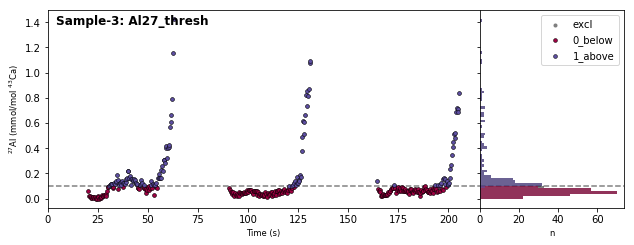

In [25]:
self.filt_report('Al27', 'Al27')

In [26]:
eg.filter_reports(analytes='Al27', filt_str='thresh')

Drawing Plots: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


In [27]:
filts

NameError: name 'filts' is not defined

In [50]:
fgnames == fgrps[i]

array([ True,  True], dtype=bool)

In [53]:
nfilts

array([['Al27', 'thresh', 'below'],
       ['Al27', 'thresh', 'above']], 
      dtype='<U6')

In [61]:
fgnames

array(['Al27_thresh', 'Al27_thresh'], 
      dtype='<U11')

In [65]:
nfilts

array([['Al27', 'thresh', 'below'],
       ['Al27', 'thresh', 'above']], 
      dtype='<U6')

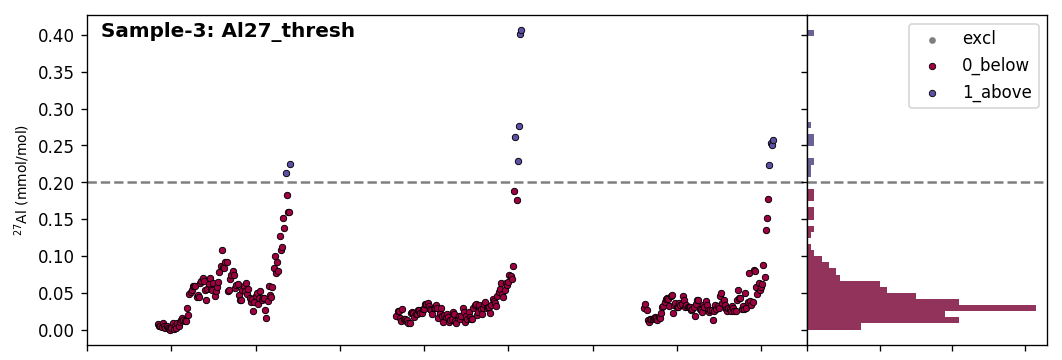

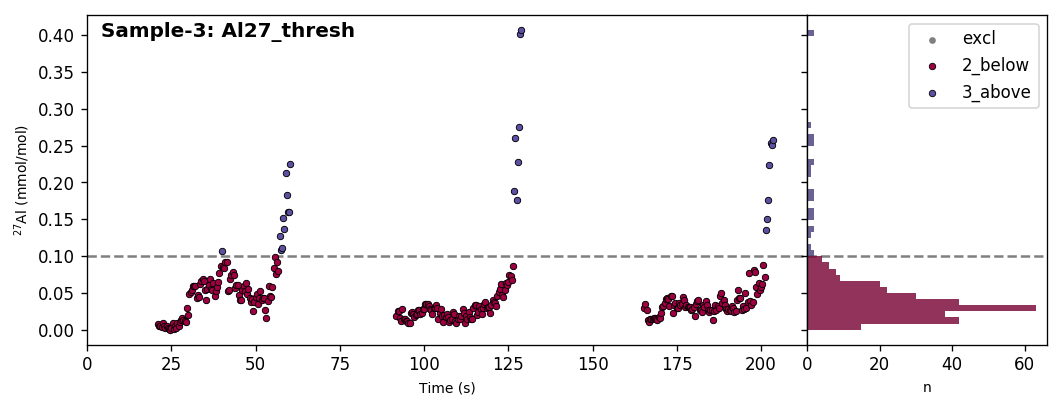

['Al27']

In [32]:
nfilts

array([['Al27', 'thresh', 'below'],
       ['Al27', 'thresh', 'above'],
       ['Al27', 'thresh', 'below'],
       ['Al27', 'thresh', 'above']], 
      dtype='<U6')

In [13]:
eg.filter_clear()

In [16]:
d.filt.sets

{0: ['0_Al27_thresh_below', '1_Al27_thresh_above']}

In [15]:
d.filt_report(analytes='Al27')

IndexError: too many indices for array

## filt_report must be tweaked to work with new naming!

In [27]:
d.filt.index

{0: '0_Al27_thresh_below',
 1: '1_Al27_thresh_above',
 2: '2_Al27_thresh_below',
 3: '3_Al27_thresh_above',
 4: '4_Al27_thresh_below',
 5: '5_Al27_thresh_above'}

(<matplotlib.figure.Figure at 0x11a846630>,
 <matplotlib.axes._axes.Axes at 0x11a846f60>)

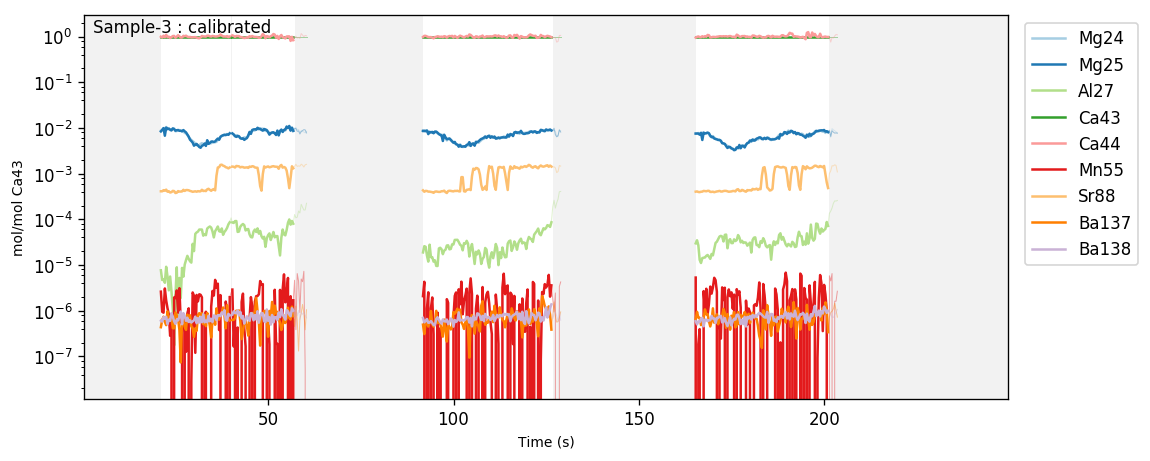

In [28]:
d.tplot(scale='log', filt=True)

In [3]:
target_analytes = ['Mg24', 'Mg25', 'Ba138']

dat.minimal_export(target_analytes)


In [4]:
d = reproduce('latools/resources/minimal_export/analysis.log')

latools analysis using "REPRODUCE" configuration:
  5 Data Files Loaded: 2 standards, 3 samples
  Analytes: Ba138 Ca43 Mg24 Mg25
  Internal Standard: Ca43
SRM values loaded from: latools/resources/minimal_export/srm.table
Calculating exponential decay coefficient
from SRM Ca43 washouts...
  -2.28


AutoRange: 100%|██████████| 5/5 [00:00<00:00,  9.50it/s]


Calculating moving weighted mean background (fwhm=300.0s)...


Calibration: 100%|██████████| 5/5 [00:00<00:00, 31.59it/s]
